# 2章

In [1]:
load("data/chap02/data.RData")

In [2]:
ls.str()

data :  num [1:50] 2 2 4 6 4 5 2 3 1 2 ...

In [3]:
sapply(c("pipeR", "ggplot2", "dplyr", "tidyr", "readr"), require, character.only = TRUE)

Loading required package: pipeR
Warning message:
: package ‘pipeR’ was built under R version 3.2.4Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.2.4Loading required package: dplyr

Attaching package: ‘dplyr’

 以下のオブジェクトは ‘package:stats’ からマスクされています: 

     filter, lag 

 以下のオブジェクトは ‘package:base’ からマスクされています: 

     intersect, setdiff, setequal, union 

Loading required package: tidyr
Loading required package: readr


pipeR ggplot2   dplyr   tidyr   readr 
   TRUE    TRUE    TRUE    TRUE    TRUE

In [4]:
length(data)

[1] 50

In [5]:
summary(data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    2.00    3.00    3.56    4.75    7.00 

In [6]:
table(data)

data
 0  1  2  3  4  5  6  7 
 1  3 11 12 10  5  4  4 

In [7]:
options(repr.plot.width = 4, repr.plot.height = 4)

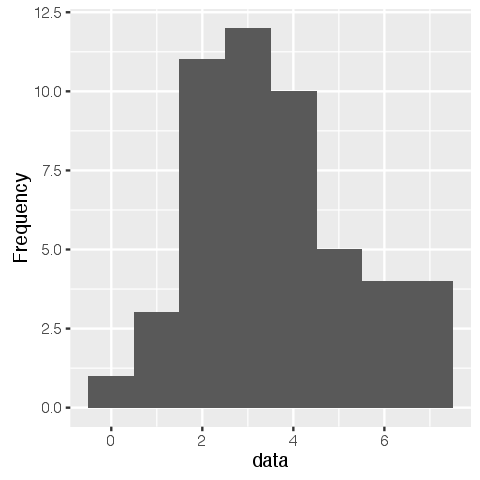

In [8]:
data_frame(data = data) %>>% 
    ggplot(aes(x = data)) + 
        geom_histogram(binwidth = 1) + 
        ylab("Frequency")

In [9]:
var(data)

[1] 2.986122

In [10]:
sd(data)

[1] 1.72804

In [11]:
var(data) %>>% sqrt

[1] 1.72804

## 2.2

In [12]:
y <- 0:9
prob <- dpois(y, lambda = 3.56)

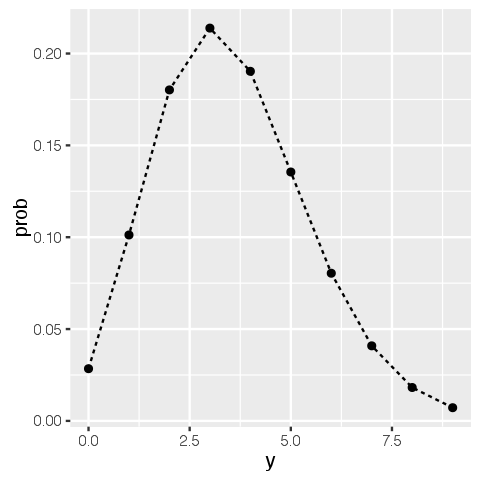

In [13]:
data_frame(y, prob) %>>% 
    ggplot(aes(y, prob)) + 
    geom_line(linetype = 2) +
    geom_point()

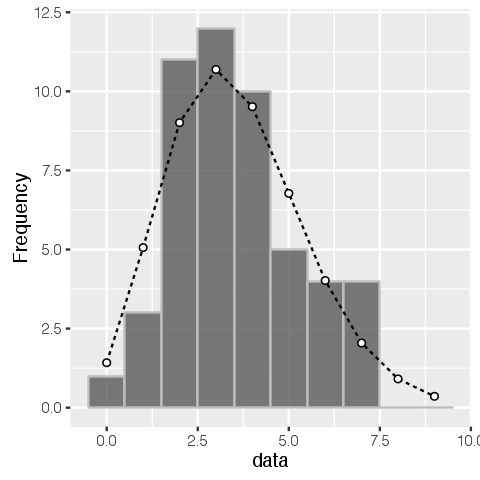

In [14]:
ggplot() + 
    geom_histogram(data = data_frame(x = data), aes(x = x), col = "gray", alpha = 0.8, binwidth = 1) + 
    geom_line(data = data_frame(y, prob = prob * 50), aes(x = y, y = prob), linetype = 2) + 
    geom_point(data = data_frame(y, prob = prob * 50), aes(x = y, y = prob), shape = 21, fill = "white") + 
    ylab("Frequency") + 
    xlab("data")

ポアソン分布

$$p(y | \lambda) = \frac{\lambda^y \exp(-\lambda)}{y!} $$

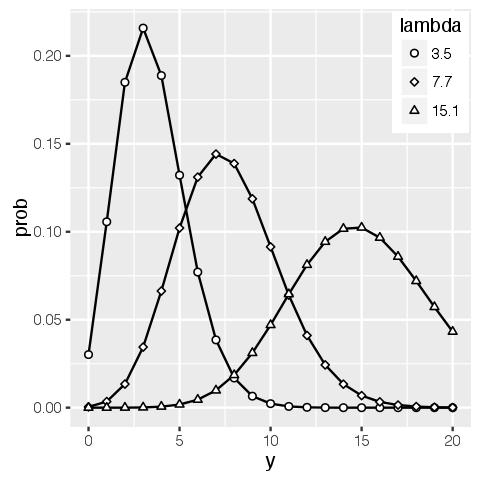

In [15]:
data_frame(x = c(0:20), y1 = dpois(x, lambda = 3.5), y2 = dpois(x, lambda = 7.7), y3 = dpois(x, lambda = 15.1)) %>>%
    gather(lambda, val, -x) %>>%
    ggplot(aes(x = x, y = val, shape = lambda)) + 
    geom_line() + 
    geom_point(fill = "white") + 
    ylab("prob") + 
    xlab("y") + 
    scale_shape_manual(values = c(21, 23, 24), labels = c("3.5", "7.7", "15.1")) + 
    theme(legend.position=c(.9, .85))

## 2.4

In [16]:
logL <- function(m){
    dpois(data, m, log = TRUE) %>>% sum
}
lambda <- seq(2, 5, 0.1)

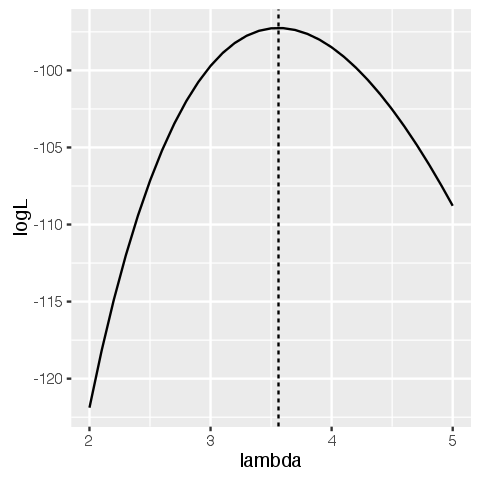

In [17]:
data_frame(lambda, logL = sapply(lambda, logL)) %>>% 
    ggplot(aes(x = lambda, y = logL)) + 
        geom_line() + 
        geom_vline(xintercept = 3.56, linetype = 2)

## 2.4

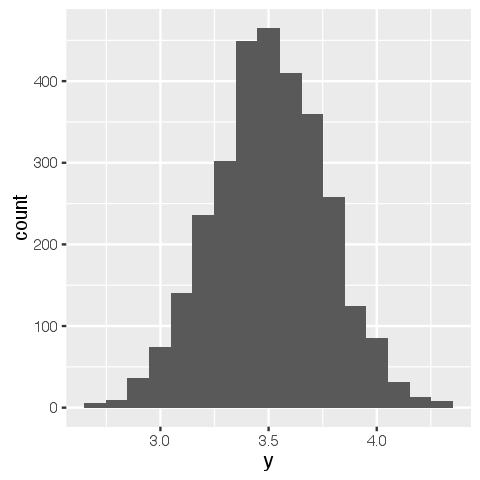

In [18]:
data_frame(y = sapply(c(1:3000), function(x){
    rpois(50, lambda = 3.5) %>>% mean
})) %>>% ggplot(aes(x = y)) + 
    geom_histogram(binwidth = 0.1)

In [19]:
date()

[1] "Sun Jun 12 00:17:20 2016"

In [20]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------
Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.2.3 (2015-12-10)
 system   x86_64, darwin13.4.0        
 ui       X11                         
 language (EN)                        
 collate  ja_JP.UTF-8                 
 tz       Asia/Tokyo                  
 date     2016-06-12                  

 package    * version date       source        
 assertthat   0.1     2013-12-06 CRAN (R 3.2.0)
 base64enc    0.1-3   2015-07-28 CRAN (R 3.2.0)
 Cairo        1.5-9   2015-09-26 CRAN (R 3.2.0)
 colorspace   1.2-6   2015-03-11 CRAN (R 3.2.0)
 DBI          0.4-1   2016-05-08 CRAN (R 3.2.5)
 devtools     1.11.1  2016-04-21 CRAN (R 3.2.5)
 digest       0.6.9   2016-01-08 CRAN (R 3.2.2)
 dplyr      * 0.4.3   2015-09-01 CRAN (R 3.2.0)
 evaluate     0.9     2016-04-29 CRAN (R 3.2.5)
 ggplot2    * 2.1.0   2016-03-01 CRAN (R 3.2.4)
 gtable       0.2.0   2016-02-26 CRAN (R 3.2.3)
 IRdisplay    0.3     2016-05-14 local         
 IRkernel     0.5     2016-05-14 local         
 jsonlite     0